In [2]:
import tensorflow as tf
import os

In [3]:
# gpus = tf.config.experimental.list_physical_devices('GPU')

[]


In [5]:
import cv2
import imghdr

In [7]:
image_exts = ['jpg','jpeg','bmp','png']
data_dir = 'data'

In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('issue with image {}'.format(image_path))

Image not in ext list data\happy\16490402-happy-people-business-team-group-together-isolated-on-white-background.jpg
Image not in ext list data\happy\21411256-young-happy-people-group-portrait.jpg
Image not in ext list data\happy\2560px-Happy_People.jpg
Image not in ext list data\happy\56f455011e0000b300705475.jpeg
Image not in ext list data\happy\cheerful-middle-eastern-family-three-260nw-1936256839.jpg
Image not in ext list data\happy\guilherme-stecanella-375176-unsplash.jpg
Image not in ext list data\happy\portrait-happy-young-black-woman-260nw-576995383.jpg
Image not in ext list data\happy\portrait-smiling-young-friends-walking-260nw-1392193913.jpg
Image not in ext list data\happy\traitshappypeople.jpg.webp
Image not in ext list data\happy\young-woman-curly-hair-laughing-260nw-1687578475.jpg
Image not in ext list data\sad\39843138-sad-man.jpg
Image not in ext list data\sad\50740738-sad-people-s-portraits.jpg
Image not in ext list data\sad\african-american-depressive-sad-broken-260n

In [9]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Tensor(3, s

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [40]:
data = tf.keras.utils.image_dataset_from_directory('data', batch_size=16)

Found 92 files belonging to 2 classes.


In [12]:
tf.keras.utils.image_dataset_from_directory??


Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [41]:
# the data var is not loaded into memory (just a generator) so w need to load it like so
data_iterator = data.as_numpy_iterator()

In [42]:
# splits the iterator into many batches and gets a batch from them
#  (set of numpy arrays)
batch = data_iterator.next()

In [33]:
len(batch)
# this result is because of having the set of pictures (numpy arrays) and their labels

2

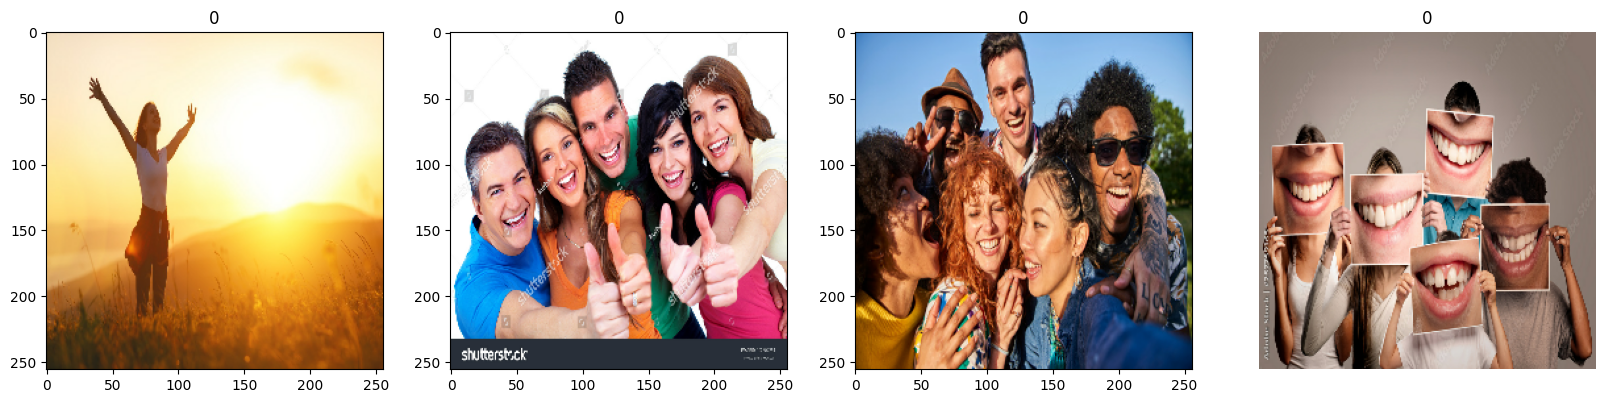

In [43]:
fig , ax = plt.subplots(ncols=4, figsize=(20,20))
plt.axis('off')

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
# we can see that 0 stands for happy and 1 stands for sad

# Preprocessing


In [44]:
# we scale the values for better performances
scaled = batch[0] / 255

scaled.max()

1.0

In [45]:
# apply the scaling for all the data (using lambda + map function)
data = data.map(lambda x,y: (x/255, y))

In [46]:
# verification of the max/min values
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].max()

1.0

In [50]:
# len(data)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [48]:
# partitionning the dataset
train_size = int(len(data)*2/3)
val_size = int(len(data)/6)
test_size = int(len(data)/6)

4 1 1


In [51]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Building the Deep Learning model 

In [57]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [58]:
model = Sequential()

In [59]:
# the deep neural network architecture

# the first layer is a convolution with 16 filters of 3*3 matrix kernels and a 1 pixel stride
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# it also contain a max pooling layer formed of 2*2 filters (N.B: max pooling takes the max of activation among small pixel batches of 2*2)
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [60]:
model.compile(
    optimizer='adam',
    loss=tf.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [61]:
# see some statistics about the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [62]:
logdir='logs'
# usefull for investing in the logs of the model (in cas we want to save it at some particular point)
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)


In [63]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 6s 1s/step - loss: 1.2783 - accuracy: 0.5781 - val_loss: 0.3959 - val_accuracy: 0.8750
Epoch 2/20
4/4 [==============================] - 3s 686ms/step - loss: 0.5702 - accuracy: 0.7656 - val_loss: 0.5714 - val_accuracy: 0.7500
Epoch 3/20
4/4 [==============================] - 3s 751ms/step - loss: 0.5281 - accuracy: 0.7656 - val_loss: 0.7236 - val_accuracy: 0.6875
Epoch 4/20
4/4 [==============================] - 4s 909ms/step - loss: 0.4471 - accuracy: 0.7969 - val_loss: 0.4217 - val_accuracy: 0.8125
Epoch 5/20
4/4 [==============================] - 3s 654ms/step - loss: 0.4733 - accuracy: 0.7500 - val_loss: 0.5311 - val_accuracy: 0.6875
Epoch 6/20
4/4 [==============================] - 3s 724ms/step - loss: 0.4512 - accuracy: 0.7656 - val_loss: 0.3660 - val_accuracy: 0.8750
Epoch 7/20
4/4 [==============================] - 4s 872ms/step - loss: 0.3823 - accuracy: 0.7812 - val_loss: 0.3702 - val_accuracy: 0.8750
Epoch 8/20
4/4 [=======

In [64]:
# see some statistics about the training
hist.history

{'loss': [1.2783470153808594,
  0.5701556205749512,
  0.5281081795692444,
  0.44714438915252686,
  0.4732530415058136,
  0.45124733448028564,
  0.3822764456272125,
  0.344268262386322,
  0.3700283169746399,
  0.22140365839004517,
  0.17728547751903534,
  0.21896827220916748,
  0.21502681076526642,
  0.1863979697227478,
  0.15912500023841858,
  0.08990884572267532,
  0.04772693291306496,
  0.036258794367313385,
  0.017188217490911484,
  0.040656667202711105],
 'accuracy': [0.578125,
  0.765625,
  0.765625,
  0.796875,
  0.75,
  0.765625,
  0.78125,
  0.828125,
  0.828125,
  0.984375,
  0.90625,
  0.890625,
  0.859375,
  0.953125,
  1.0,
  0.984375,
  1.0,
  1.0,
  1.0,
  0.984375],
 'val_loss': [0.3959317207336426,
  0.5714390277862549,
  0.7236353754997253,
  0.4216538071632385,
  0.5311024785041809,
  0.36598682403564453,
  0.3701600134372711,
  0.5524060726165771,
  0.29719674587249756,
  0.11651889979839325,
  0.08706498146057129,
  0.10875774919986725,
  0.10356029868125916,
  0.11

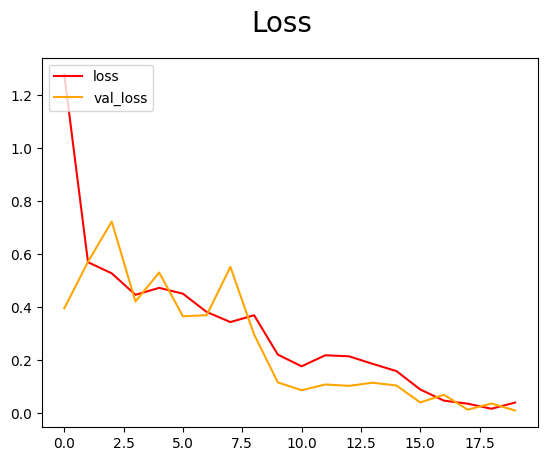

In [67]:
# loss statistics (train -> 'loss' / validation -> 'val loss )
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

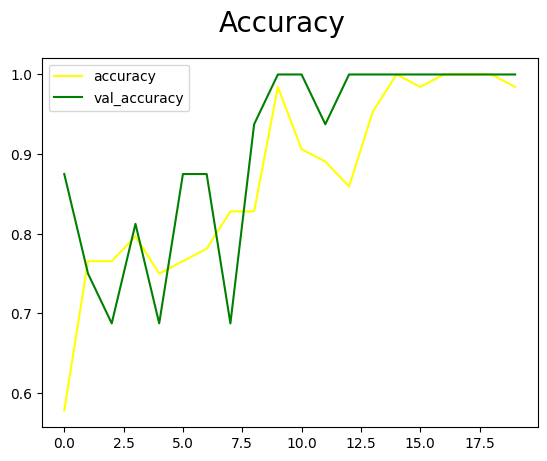

In [68]:
# loss statistics (train -> 'accuracy' / validation -> 'val accuracy )
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='yellow', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='green', label='val_accuracy')
plt.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# Evaluation 

In [69]:
from keras.metrics import Precision, Recall, BinaryAccuracy

In [70]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [73]:
# run the metrics on the test batches
for batch in test.as_numpy_iterator():
    x,y = batch
    y_pred = model.predict(x)
    pre.update_state(y, y_pred)
    re.update_state(y, y_pred)
    acc.update_state(y, y_pred)

1/1 [==============================] - 0s 131ms/step


In [75]:
print(' Precision : {}\n Recall : {}\n Accuracy : {}'.format(pre.result().numpy() , re.result().numpy(), acc.result().numpy()))

 Precision : 1.0
 Recall : 1.0
 Accuracy : 1.0


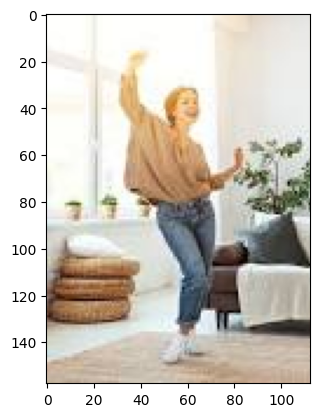

In [91]:
# further testing
img = cv2.imread('./test/happy.jpeg')
# cv2 saves images as BGR, so they might look 
# weird when attempting to visualize them directly
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

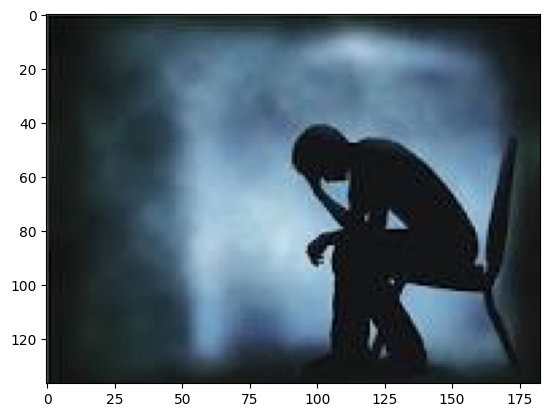

In [85]:
img = cv2.imread('./test/sad.jpeg')
# cv2 saves images as BGR, so they might look 
# weird when attempting to visualize them directly
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

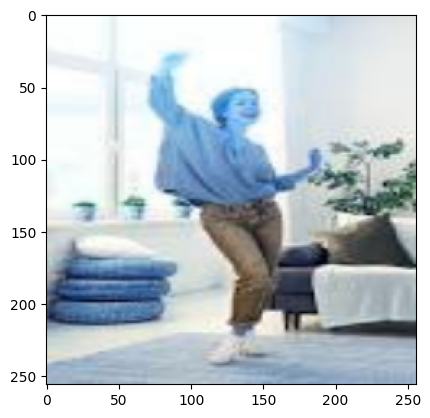

In [92]:
# the model only accepts 256*256 size images
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [93]:
# we use np.expand_dims because the model is expecting a batch, not only once picture
# therefore, we expand the dimensions of the picture 
y_hat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 30ms/step


In [94]:
y_hat

array([[0.07595447]], dtype=float32)

In [95]:
if y_hat > .5:
    print('the model says it is a sad class picture')
else:
    print('the model says it is a happy class picture')


the model says it is a happy class picture


# Save the model

In [96]:
from keras.models import load_model


In [98]:
model.save(os.path.join('models', 'happySadModel.h5'))

In [99]:
# the manner to re-load it
new_model = load_model(os.path.join('models', 'happySadModel.h5'))

In [100]:
new_model